# What is this doing
Takes the QC file I created from the raw Single Cell data and proccesses it in to clusters and subclusters

## Setup

### Imports

In [1]:
import numpy as np
import scanpy as sc
import os
import pandas as pd
import bbknn

### Single Cell settings

In [2]:
sc.settings.verbosity = 4
sc.settings.set_figure_params(80) 
sc.settings.file_format_figures = 'png'
sc.settings.savefigs = False
use_first_n_samples = 0
full_sparse = False

C:\Users\TzachiHNB2\AppData\Local\Temp\ipykernel_30984\738880785.py:2: FutureWarning: The specified parameters ('scanpy',) are no longer positional. Please specify them like `scanpy=80`
  sc.settings.set_figure_params(80)


### Defining a function for processing the data & determing the parameters

In [3]:
def processing_batch(adata, neighbors=15, key='batch', reso=0.4, random_state=0):  # Higher resolution yields more leiden clusters 
    sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver='arpack')
    sc.logging.print_memory_usage()
    sc.pp.neighbors(adata, n_neighbors=neighbors)
    sc.pl.pca_variance_ratio(adata, log=True)
    bbknn.bbknn(adata, batch_key=key, neighbors_within_batch=2, metric='euclidean', n_pcs=30, trim=None)
    sc.tl.umap(adata)
    sc.tl.leiden(adata, resolution=reso)
    sc.pl.umap(adata, color='leiden')

### Reading the excisting h5ad file I created previously in the QC pipeline 

In [4]:
#adata after QC
adata = sc.read(r'/Code/data/single_cell/animals/crocodile/crocodile_3/''crocodile_3_after_qc.h5ad') 

sc.read_h5ad(r'/Code/data/single_cell/animals/crocodile/crocodile_3/''crocodile_3_after_qc.h5ad')

AnnData object with n_obs × n_vars = 26432 × 9023
    obs: 'treatment', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'S_score', 'G2M_score', 'phase'
    var: 'gene_ids', 'feature_types', 'n_cells', 'MT', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'treatment_colors'

## Preprocessing the data 

In [5]:
adata

AnnData object with n_obs × n_vars = 26432 × 9023
    obs: 'treatment', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'S_score', 'G2M_score', 'phase'
    var: 'gene_ids', 'feature_types', 'n_cells', 'MT', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'treatment_colors'

In [6]:
adata.obs

treatment  n_genes  n_genes_by_counts  \
AAACCCAGTATCACGT-1-control   control      660                660   
AAACCCAGTCACTACA-1-control   control      873                873   
AAACCCAGTTTGCAGT-1-control   control      523                523   
AAACGAAAGGCTAAAT-1-control   control      837                837   
AAACGAACAACTCGTA-1-control   control      517                517   
...                              ...      ...                ...   
TTTGTTGGTAACCCTA-1-pic           pic      357                357   
TTTGTTGGTACAAGCG-1-pic           pic      437                437   
TTTGTTGGTTTCCATT-1-pic           pic      437                437   
TTTGTTGTCCTCACCA-1-pic           pic      662                662   
TTTGTTGTCGTCCTCA-1-pic           pic      589                589   

                            total_counts  total_counts_MT  pct_counts_MT  \
AAACCCAGTATCACGT-1-control        2319.0              0.0            0.0   
AAACCCAGTCACTACA-1-control        3415.0              0.0            0.0   
AAACCCAGTTTGCAGT-1-control         907.0              0.0            0.0   
AAACGAAAGGCTAAAT-1-control        2047.0              0.0            0.0   
AAACGAACAACTCGTA-1-control        2226.0              0.0            0.0   
...                                  ...              ...            ...   
TTTGTTGGTAACCCTA-1-pic            1639.0              0.0            0.0   
TTTGTTGGTACAAGCG-1-pic             990.0              0.0            0.0   
TTTGTTGGTTTCCATT-1-pic             905.0              0.0            0.0   
TTTGTTGTCCTCACCA-1-pic            1118.0              0.0            0.0   
TTTGTTGTCGTCCTCA-1-pic            1087.0              0.0            0.0   

                             S_score  G2M_score phase  
AAACCCAGTATCACGT-1-control -0.182143   0.213951   G2M  
AAACCCAGTCACTACA-1-control -0.078551  -0.126964    G1  
AAACCCAGTTTGCAGT-1-control -0.311757  -0.077434    G1  
AAACGAAAGGCTAAAT-1-control -0.233329  -0.162777    G1  
AAACGAACAACTCGTA-1-control -0.106891   0.112648   G2M  
...                              ...        ...   ...  
TTTGTTGGTAACCCTA-1-pic     -0.142458  -0.056265    G1  
TTTGTTGGTACAAGCG-1-pic     -0.235150  -0.135971    G1  
TTTGTTGGTTTCCATT-1-pic     -0.089621  -0.049433    G1  
TTTGTTGTCCTCACCA-1-pic     -0.062416  -0.159452    G1  
TTTGTTGTCGTCCTCA-1-pic      0.257475  -0.219790     S  

[26432 rows x 9 columns]

In [7]:
adata.var

gene_ids    feature_types  n_cells     MT  \
gene_name                                                          
HMGX4       TRINITY_DN684_c0_g2  Gene Expression     5363  False   
ZN540      TRINITY_DN1733_c2_g1  Gene Expression      130  False   
1B04       TRINITY_DN1037_c5_g6  Gene Expression     1997  False   
CRADD      TRINITY_DN1973_c0_g1  Gene Expression     2127  False   
ZN362      TRINITY_DN1113_c0_g3  Gene Expression      305  False   
...                         ...              ...      ...    ...   
ENTP4      TRINITY_DN4958_c0_g2  Gene Expression      628  False   
NEPRO-1    TRINITY_DN4017_c0_g1  Gene Expression       72  False   
TBCD8-5    TRINITY_DN3760_c1_g1  Gene Expression      408  False   
HDAC6-9    TRINITY_DN2069_c0_g1  Gene Expression     1117  False   
EIF3C-6     TRINITY_DN101_c1_g1  Gene Expression        7  False   

           n_cells_by_counts  mean_counts  pct_dropout_by_counts  total_counts  
gene_name                                                                       
HMGX4                   5363     0.229290              81.419118        6618.0  
ZN540                    130     0.004504              99.549596         130.0  
1B04                    1997     0.072931              93.081107        2105.0  
CRADD                   2127     0.082147              92.630704        2371.0  
ZN362                    305     0.010844              98.943284         313.0  
...                      ...          ...                    ...           ...  
ENTP4                    628     0.022555              97.824204         651.0  
NEPRO-1                   72     0.002495              99.750546          72.0  
TBCD8-5                  408     0.014690              98.586426         424.0  
HDAC6-9                 1117     0.040744              96.129993        1176.0  
EIF3C-6                    7     0.000243              99.975747           7.0  

[9023 rows x 8 columns]

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    Gene indices [1361 8448] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


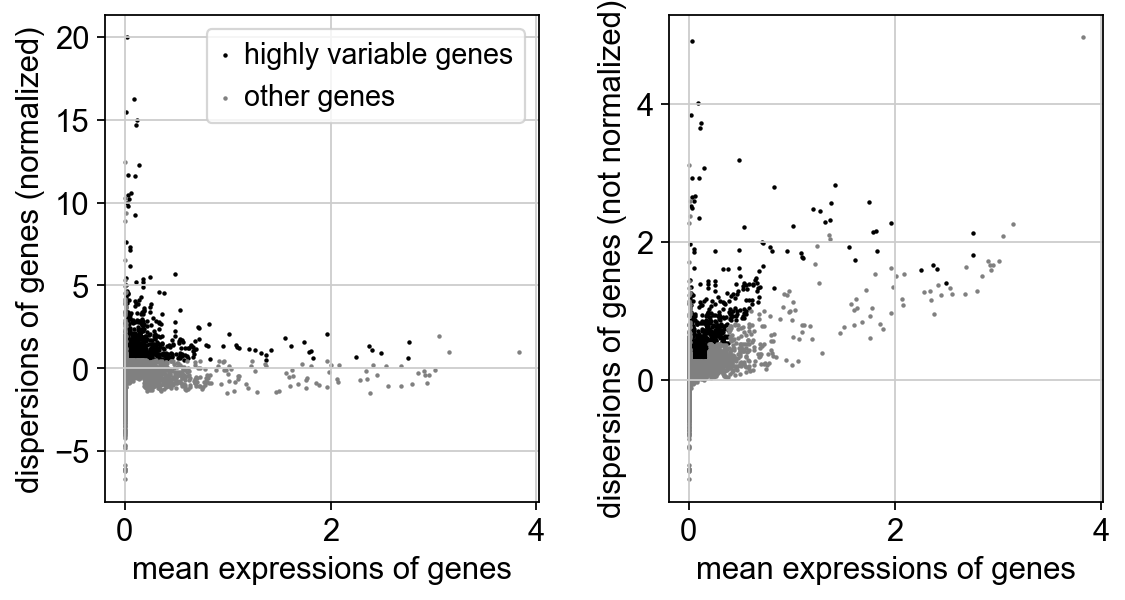

In [8]:
# Cleaning, normalizing, reducing dimensionality, clustering cells and creating visualizations.

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
adata.raw = adata

In [9]:
sc.pp.regress_out(adata, ['total_counts','pct_counts_MT'])

# Got it from: https://github.com/theislab/single-cell-tutorial/issues/35
sc.pp.scale(adata, max_value=10)
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata) 

regressing out ['total_counts', 'pct_counts_MT']
    sparse input is densified and may lead to high memory use
    finished (0:03:02)
    ... clipping at max_value 10
computing PCA
    with n_comps=50


c:\Python\Python310\lib\site-packages\scanpy\preprocessing\_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


    finished (0:00:09)
    and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', the variance / eigenvalues (adata.uns)
    'pca_variance_ratio', the variance ratio (adata.uns)
computing neighbors
    computing neighbors
    using 'X_pca' with n_pcs = 50
    computed neighbors (0:00:35)
    computed connectivities (0:00:02)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:38)
computing UMAP


  0%|          | 0/200 [00:00<?, ?it/s]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:19)


In [10]:
processing_batch(adata, key='treatment')

    ... clipping at max_value 10
computing PCA
    with n_comps=50
    finished (0:00:09)
    and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', the variance / eigenvalues (adata.uns)
    'pca_variance_ratio', the variance ratio (adata.uns)
Memory usage: current 2.81 GB, difference +2.81 GB
computing neighbors
        initialized `.distances` `.connectivities` 
    computing neighbors
    using 'X_pca' with n_pcs = 50
    computed neighbors (0:00:03)
    computed connectivities (0:00:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP


  0%|          | 0/200 [00:00<?, ?it/s]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)
running Leiden clustering


C:\Users\TzachiHNB2\AppData\Local\Temp\ipykernel_30984\2800874316.py:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=reso)


    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


ranking genes
    consider 'treatment' groups:
    with sizes: [5772 6244 7979 6437]
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:29)


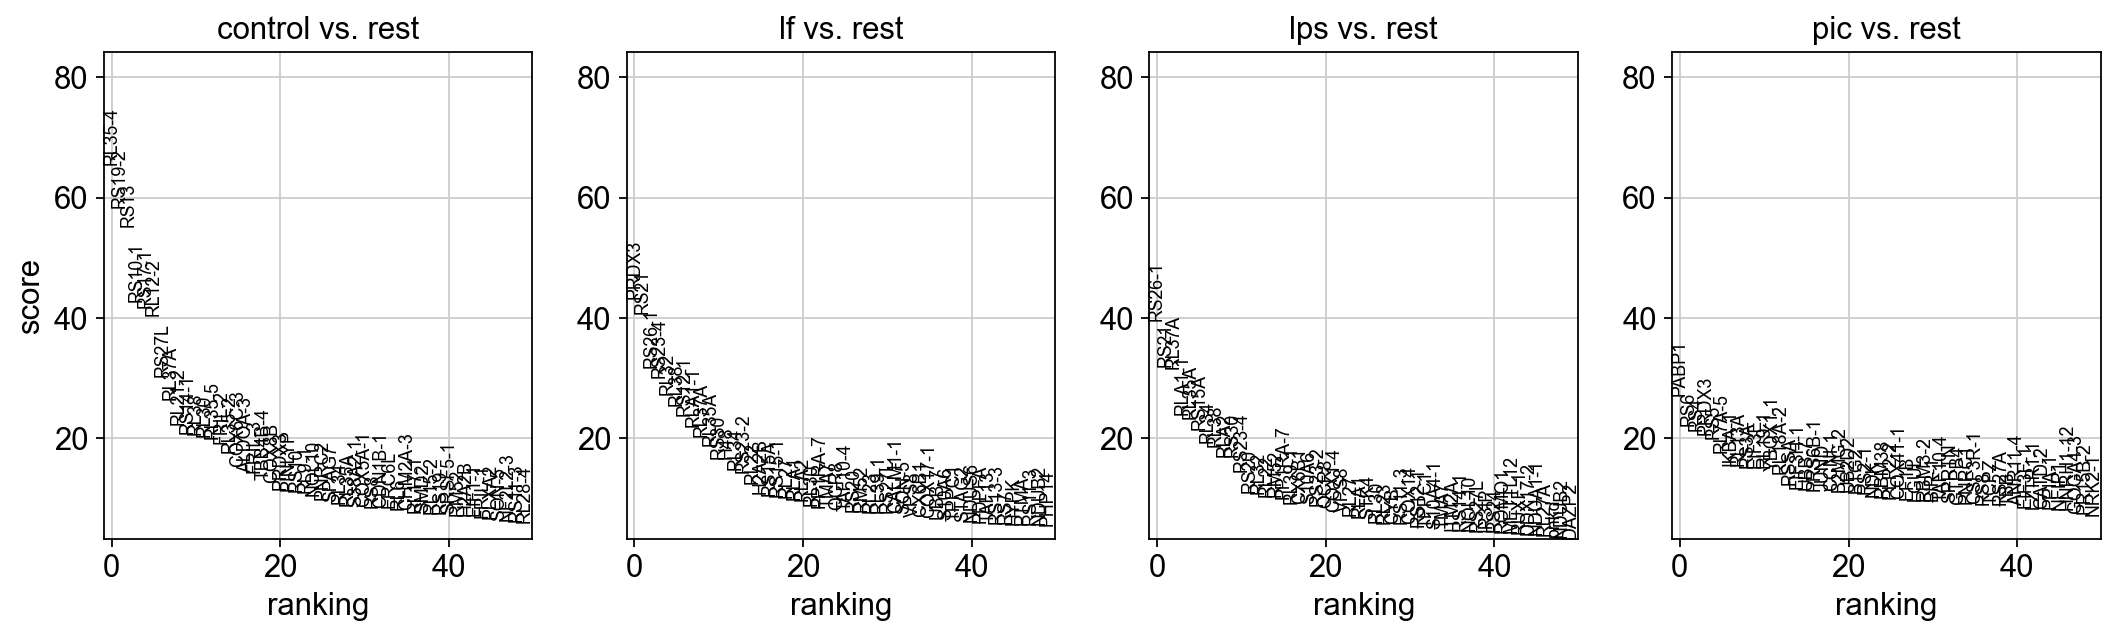

control      lf      lps      pic
0    RL35-4   PRDX3   RS26-1    PABP1
1    RS19-2    RS21     RS21      RS6
2      RS13  RS26-1    RL37A      RS4
3    RS10-1  RS23-4   RLA1-1    PRDX3
4    RS17-1    RL32    RL35A      RS5
5    RL12-2    RL38    RS15A   RL7A-5
6     RS27L  RS12-1     RL34   IKBA-1
7     RL37A  RLA1-1     RL38    RL13A
8    RL21-2   RL37A     RLA2     RS3A
9    RS14-1   RL35A     RS30    EIF3E
10     RL38    RS30   RS23-4   RL19-1
11     RL30     H48     RS20  YBOX1-1
12   RL35-5    RL34     RL32  RL18A-2
13   FRIL-2  RS23-2     RL22     RSSA
14   RL35-2    RL22     RM52  EIF3H-1
15  COX6C-3   H2A2B  PP1RA-7    UBB-7
16  ALDOA-3   RS15A   RL39-1  PRS6B-1
17   FRIL-3  RS15-1    CX6B1     JUND
18  TBB4B-4    RL27    S10A6   CCNI-1
19    COX8B    RLA1   RS23-2   B2MG-2

In [11]:
sc.tl.rank_genes_groups(adata, groupby='treatment', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=50, sharey=True)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)

In [12]:
adata.obs['treatment'].value_counts()

treatment
lps        7979
pic        6437
lf         6244
control    5772
Name: count, dtype: int64

### UMAP's

#### T cells

In [ ]:
sc.pl.umap(adata, color=['CD3D-2','CD28','CD226','CD48','CD47','CD37',
                         'CD37L','CD37L-1','CCR7','CXCR4','TCF20',
                         'IL7RA','CD8A','CD82','CD82-1','GATA3',
                         'NKG7','CD3Z-3'], size=50)

sc.pl.umap(adata, color='leiden', size=30)

#### B cells

In [ ]:
sc.pl.umap(adata, color=['IRF8','IRF8-1','CCR7','CCR7-1','PXK-1','BACH',
                         'BACH1','BACH1-1','BACH2','CD79B-2','CD72-9',
                         'CD72-10','CD79A','CD72-11','GPR18','PLAC8-1',
                         'PLAC8-2','IGHM','IGHM-1','IGHM-3','IGHM-4','IGHM-5',
                         'IGHM-6','IGHM-7','IGHM-8','IGHM-9','HLA-DPB1',
                         'HLA-DPB1-1','HLA-DPB1-2','CD83','CD81','CCL5'], size=50)

celltype = {'0':'0','1':'T_cells','2':'2','3':'3','4':'T_cells','5':'5','6':'6','7':'7','8':'T_cells'}
adata.obs['cell_type'] = adata.obs.leiden.map(celltype).astype('category')
sc.pl.umap(adata, color='cell_type', size=30)

#### RBC

In [ ]:
sc.pl.umap(adata, color=['HBA-7','HBB','HBB-1','HBB-3','HBB-4','HBB-14',
                         'ASB7','ASB8','ASB9','HB2D-1','HBS1L','HBB-5',
                         'HBB-6','HB2D-7','HB2D-8','HBS1L-1','HB2D-11',
                         'HB2C-2','TAL1-2','EPOR','EPOR-2','EPOR-4',
                         'RHD','RHD-1'], size=50)
 
celltype = {'0':'0','1':'T_cells','2':'2','3':'3','4':'T_cells','5':'B_cells','6':'6','7':'7','8':'T_cells'}
adata.obs['cell_type'] = adata.obs.leiden.map(celltype).astype('category')
sc.pl.umap(adata, color='cell_type', size=30)

#### Monocytes

In [ ]:
sc.pl.umap(adata, color=['SPI1','C1QR1','CSF1R','MAF-2','TET2',
                         'TLR1','TLR1-1','CCR2','CCL4','CCL4-1',
                         'GBP7','MRC1','OASL','IFIT1','IFIT1-5',
                         'RSAD2','IFIH1','CMPK2'], size=50)

celltype = {'0':'0','1':'T_cells','2':'2','3':'RBC','4':'T_cells','5':'B_cells','6':'RBC','7':'7','8':'T_cells'}
adata.obs['cell_type'] = adata.obs.leiden.map(celltype).astype('category')
sc.pl.umap(adata, color='cell_type', size=30)

#### Platelets

In [13]:
sc.pl.umap(adata, color=['PLEK','B2MG','B2MG-1','B2MG-2','B2MG-3',
                         'GNAS','GNAS-1','OAZ1','CD226','IIGP5',
                         'IIGP5-2'], size=50)

celltype = {'0':'Monocytes','1':'T_cells','2':'2','3':'RBC','4':'T_cells','5':'B_cells','6':'RBC','7':'7','8':'T_cells'}
adata.obs['cell_type'] = adata.obs.leiden.map(celltype).astype('category')
sc.pl.umap(adata, color='cell_type', size=30)

##### TLR genes in adata by treatment

In [15]:
TLR_genes = ['TLRN1', 'TLRN1-1', 'TLR1', 'TLR13', 'TLR1-1']

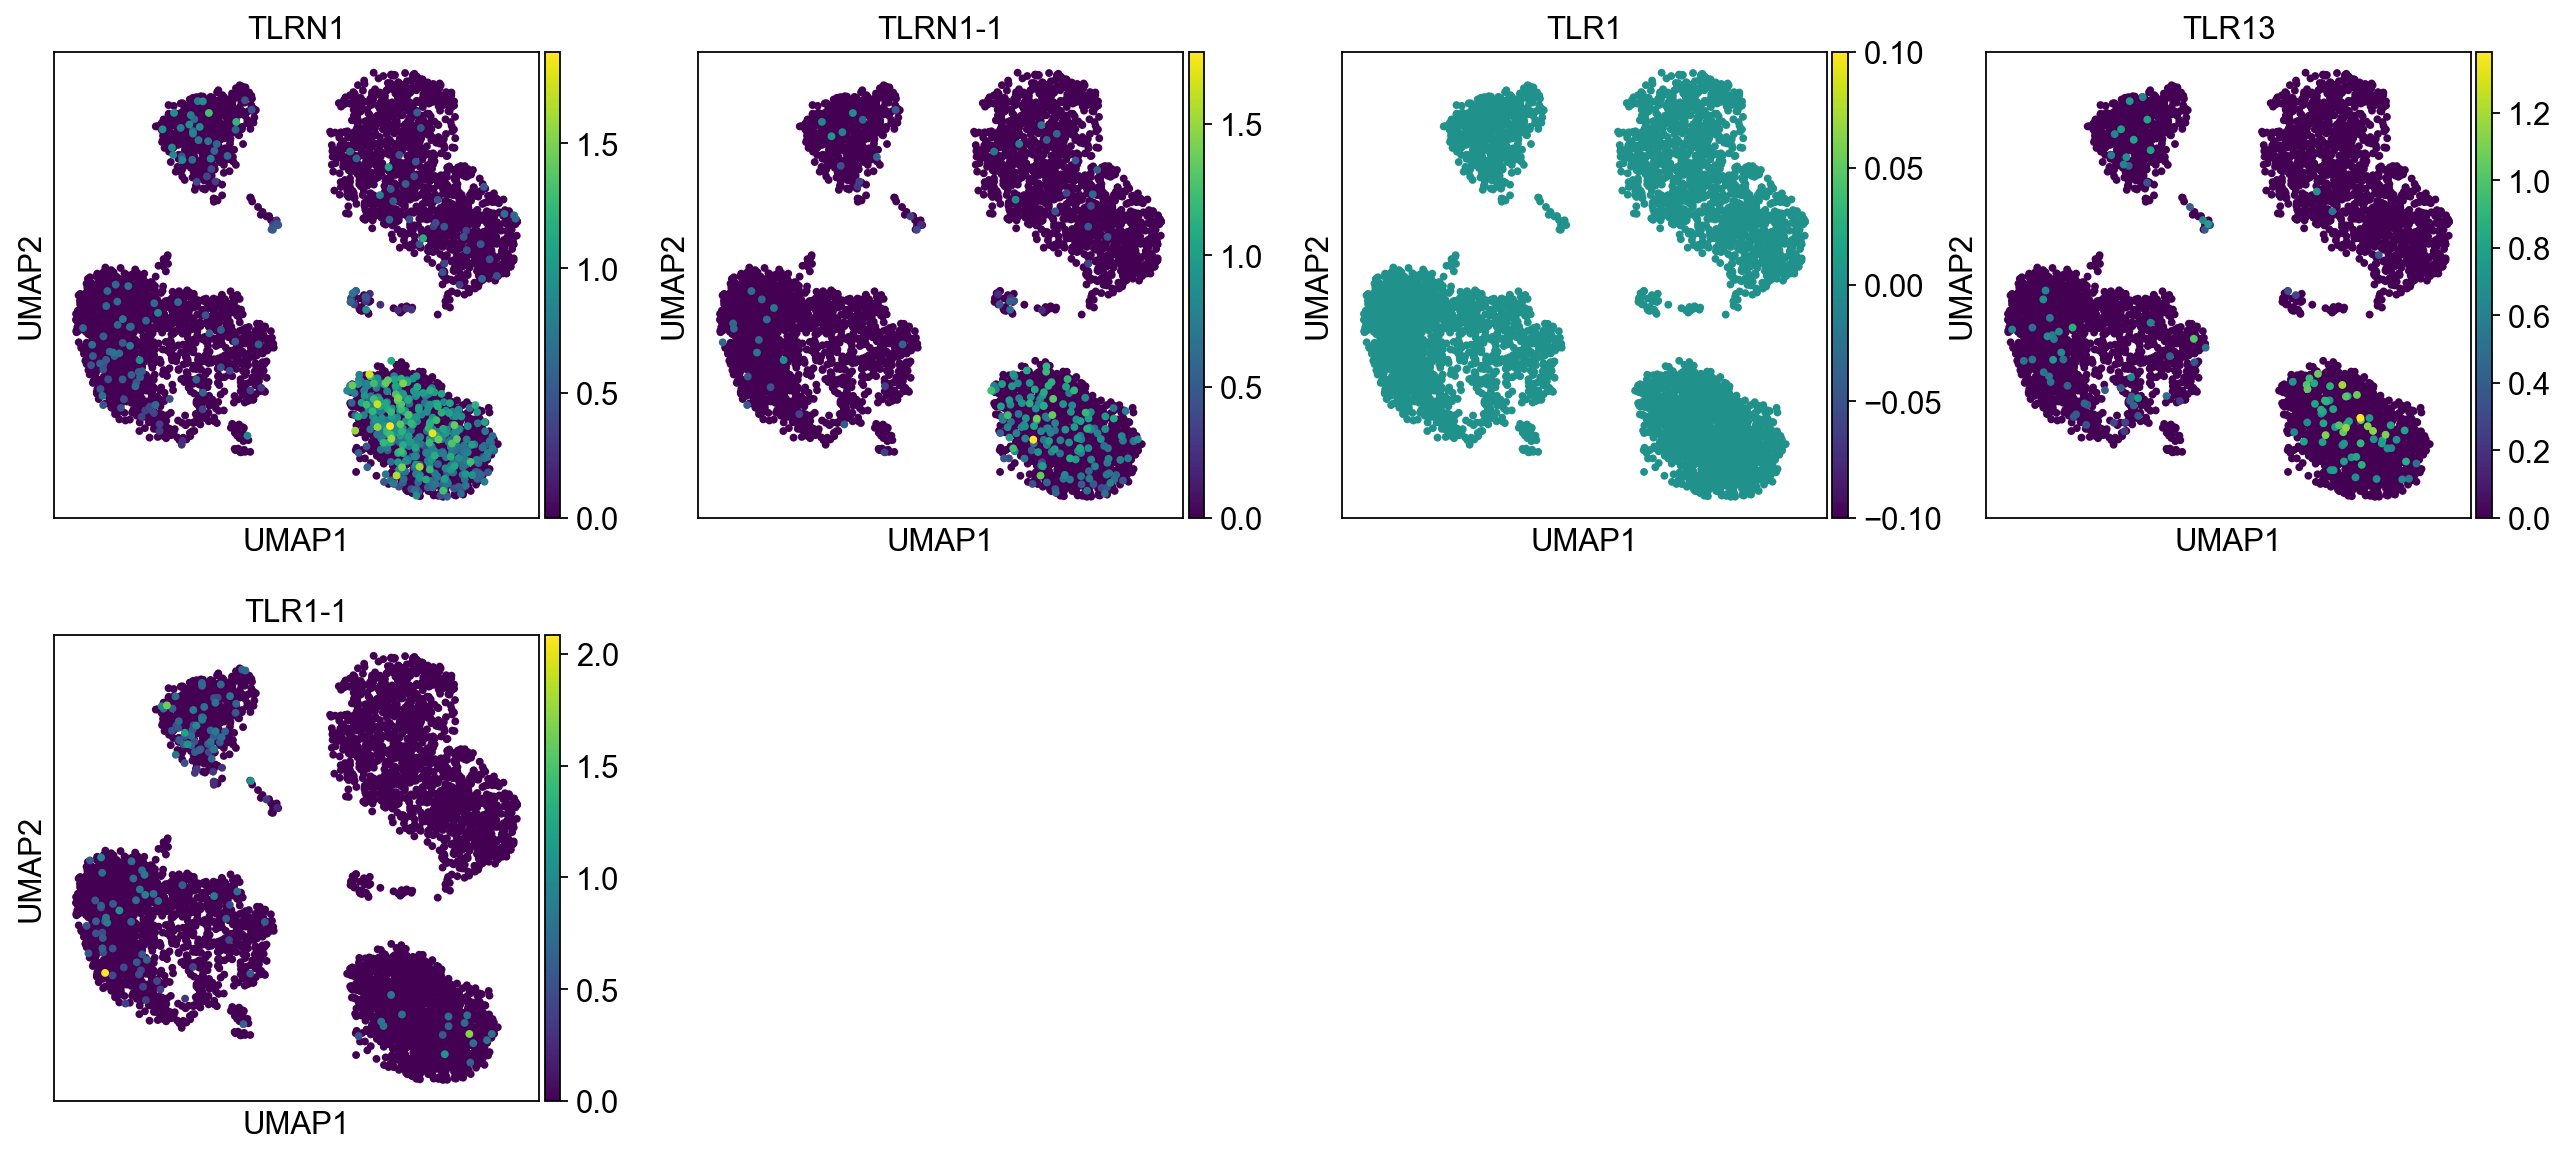

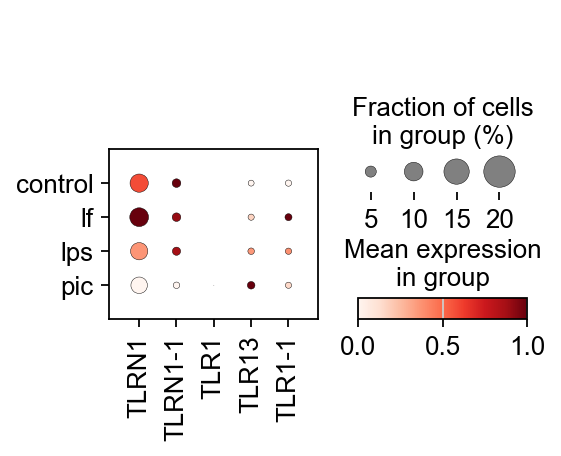

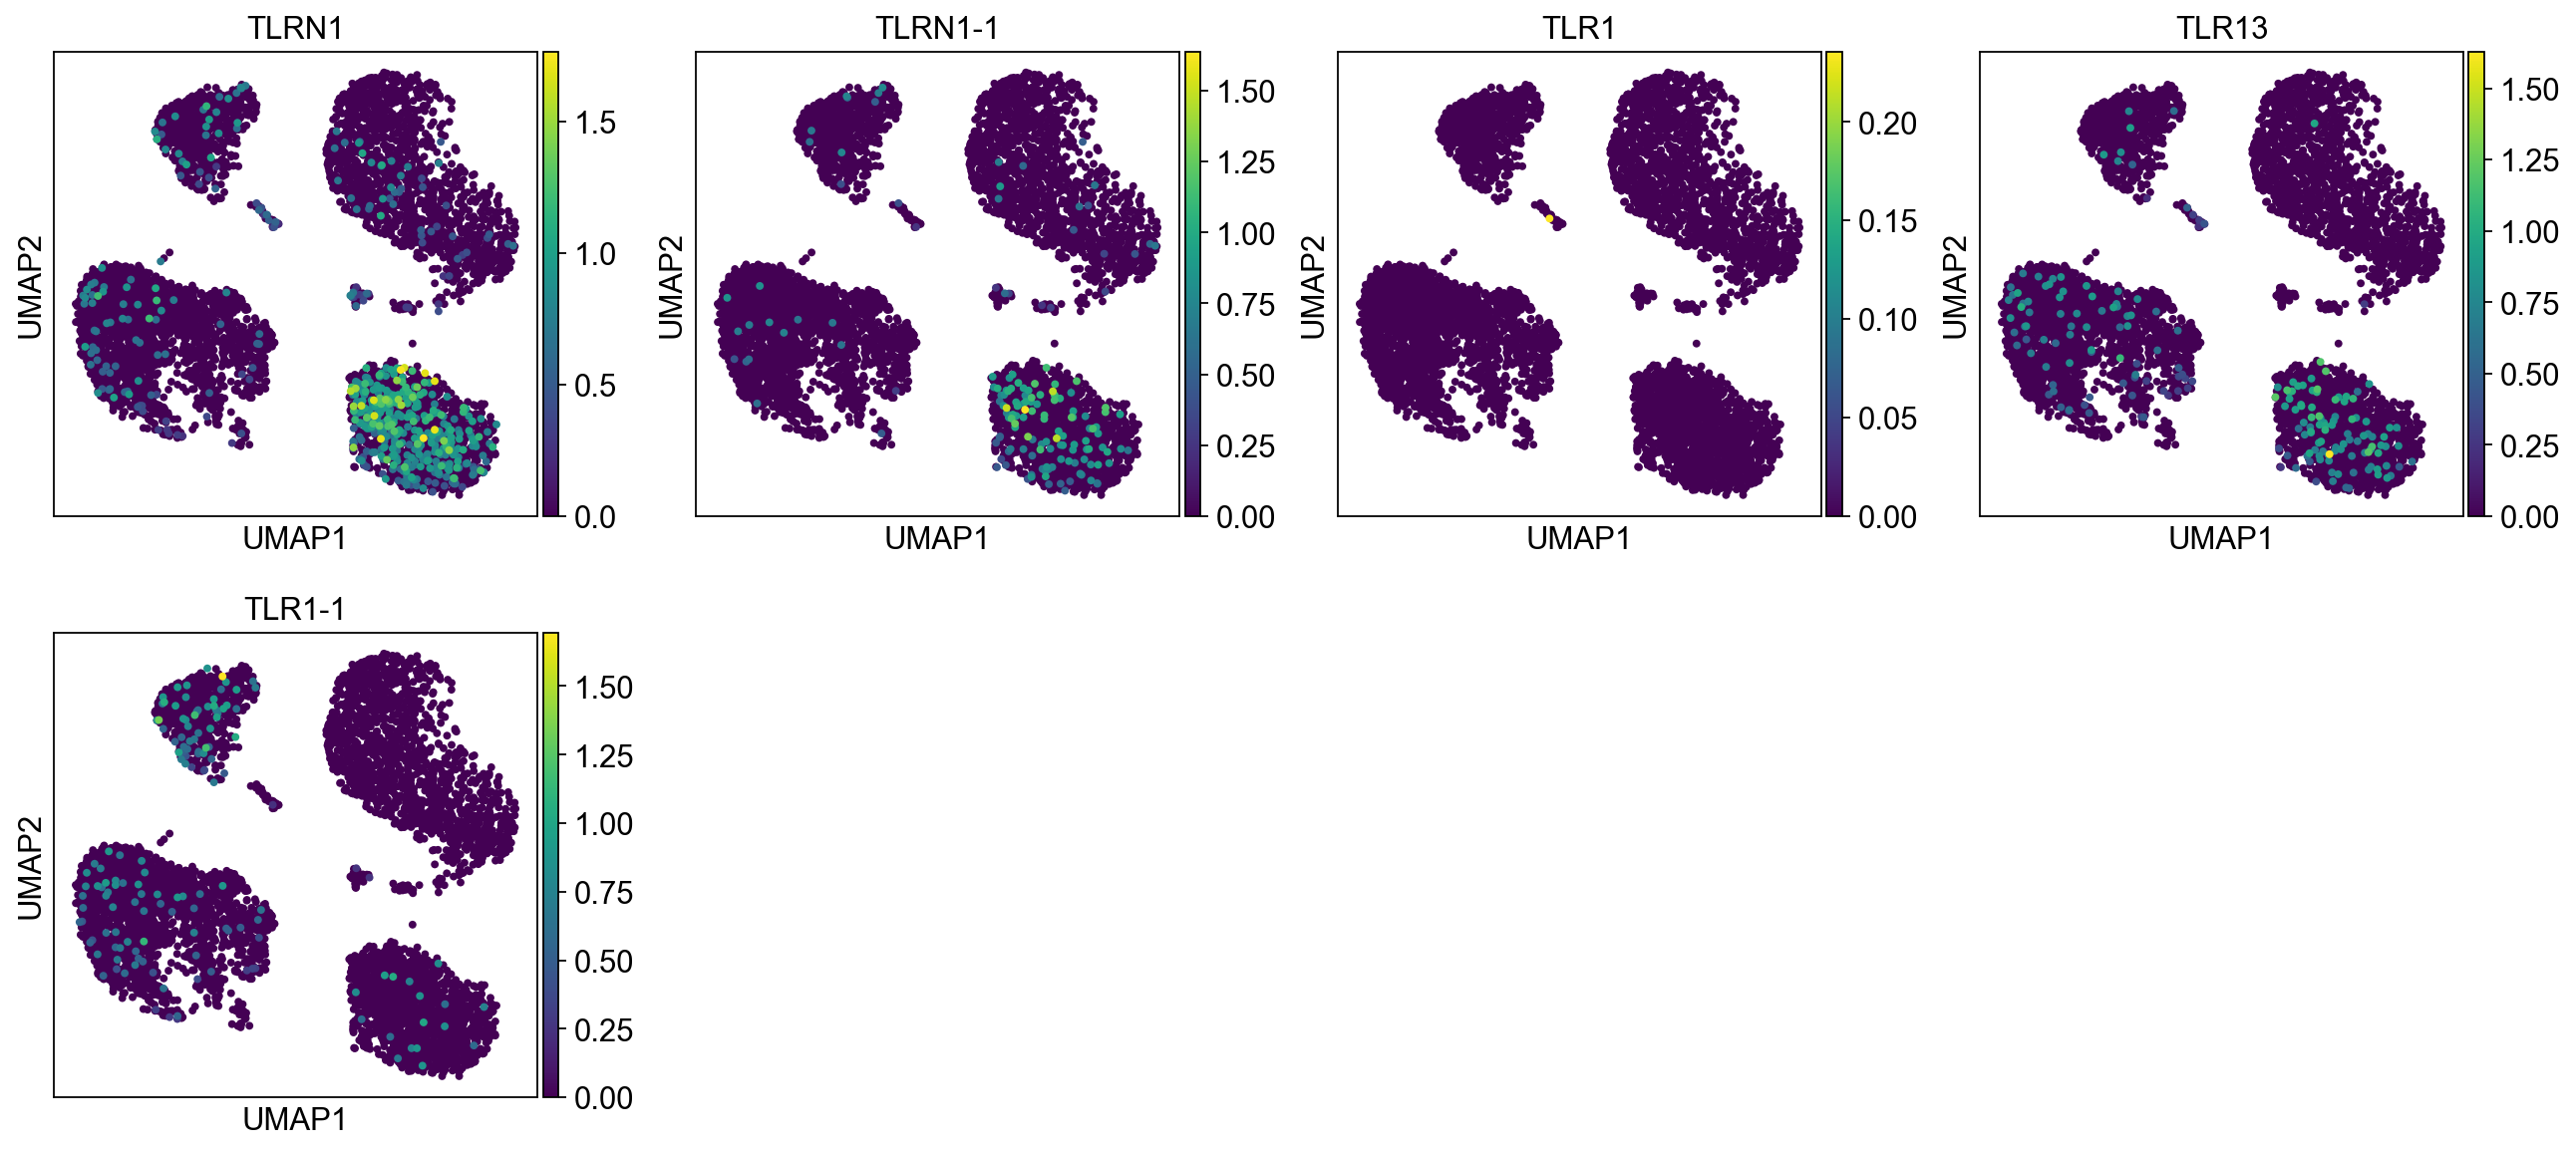

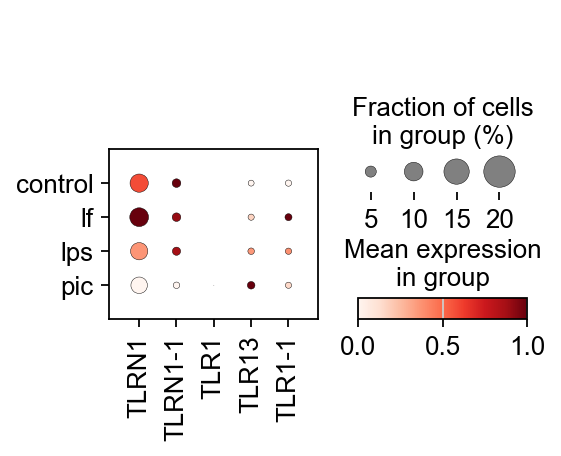

In [16]:
sc.pl.umap(adata[adata.obs['treatment'] == 'control'], color=TLR_genes, size=50)
sc.pl.dotplot(adata, TLR_genes, groupby='treatment', standard_scale='var')

sc.pl.umap(adata[adata.obs['treatment'] == 'lps'], color=TLR_genes, size=50)
sc.pl.dotplot(adata, TLR_genes, groupby='treatment', standard_scale='var')

sc.pl.umap(adata[adata.obs['treatment'] == 'pic'], color=TLR_genes, size=50)
sc.pl.dotplot(adata, TLR_genes, groupby='treatment', standard_scale='var')

In [ ]:
adata.obs['cell_type'].value_counts()

#### Checking markers

In [ ]:
sc.pl.umap(adata, color=['RHD', 'RHD-1'], size=50)

#### ISG genes 

In [ ]:
df_isg_genes = pd.read_csv('/Code/data/single_cell/animals/crocodile/crocodile_3/isg_genes_croc_3.csv', index_col=0)
df_isg_genes = df_isg_genes.sort_index()

df_isg_genes

In [ ]:
isg_genes_list = df_isg_genes.index.tolist()
isg_genes_list

##### UMAP's of the ISG genes

In [ ]:
sc.pl.umap(adata, color=isg_genes_list, size=50)

##### Dotplot of the ISG genes in expressed in turtle

In [ ]:
sc.pl.dotplot(adata, isg_genes_list, groupby='treatment', standard_scale='var')

## Gene search tools
This function returns a list of genes that are present in adata (markers for example) from an input of a general list.

In [14]:
def find_gene(gene):
    GENES = list(adata.raw.var.index[adata.raw.var.index.str.startswith(gene.upper())])
    return GENES

find_gene('tlr')

['TLRN1', 'TLRN1-1', 'TLR1', 'TLR13', 'TLR1-1']